### Importing Data from IMDB Dataset, limiting to top 10000 words

In [23]:
#import IMDB dataset, with only 10000 most frequently used words
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [24]:
#display numbers corresponding to first review
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [25]:
#display whether first review is positive or negative
train_labels[0]

np.int64(1)

In [26]:
#insure that highest number in training data does not exceed 10000
max([max(sequence) for sequence in train_data])

9999

In [27]:
#convert integers corresponding to each word back to text (for testing purposes)
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [28]:
#insure that integer to text conversion is coherent (testing above block)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [29]:
import numpy as np
#make each review the same size and put 0s where there are blanks in the tensor
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
#multi-hot encode the words that appear in the review. Only measure presence of word, not its count.
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [30]:
#testing that training results correspond to possible target values
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [31]:
#convert labels to decimals, so the computer can easily interpret them
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### This next section experiments with different models to see which one has best validation accuracy.

In [227]:
from tensorflow import keras
from tensorflow.keras import layers
#create a sequential neural network
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(8, activation="relu"),
    layers.Dropout(0.5),
#convert output into probability of 1 or 0 (positive or negative review)
    layers.Dense(1, activation="sigmoid")
])

In [228]:
#compile model. Choose backpropagation function to optimize model.
model.compile(optimizer="rmsprop",
#choose loss function to measure the amount of error.
              loss="binary_crossentropy",
#Use accuracy as measure of success, as opposed to another confusion matrix measure.
              metrics=["accuracy"])

In [229]:
#Manually set aside a training and validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [230]:
#Train model based on training data, iterating a set number of times (epochs) with a sample size corresponding to batch size.
#Compare to validation model. Store trained model into "history" variable.
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.5570 - loss: 0.6729 - val_accuracy: 0.8471 - val_loss: 0.5377
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6975 - loss: 0.5610 - val_accuracy: 0.8699 - val_loss: 0.4362
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7444 - loss: 0.4929 - val_accuracy: 0.8755 - val_loss: 0.3803
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7963 - loss: 0.4446 - val_accuracy: 0.8798 - val_loss: 0.3367
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8152 - loss: 0.4098 - val_accuracy: 0.8829 - val_loss: 0.3194
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8457 - loss: 0.3661 - val_accuracy: 0.8899 - val_loss: 0.2928
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8645 - loss: 0.3379 - val_accuracy: 0.8889 - val_loss: 0.2835
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8862 - loss: 0.3080 - val_accuracy: 0.8917 - v

In [231]:
#put epoch history values into dictionary
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

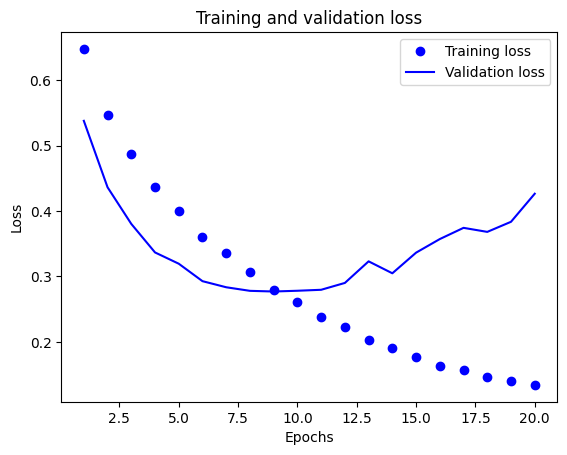

In [232]:
#plot training and validation loss based on historical epochs from model
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

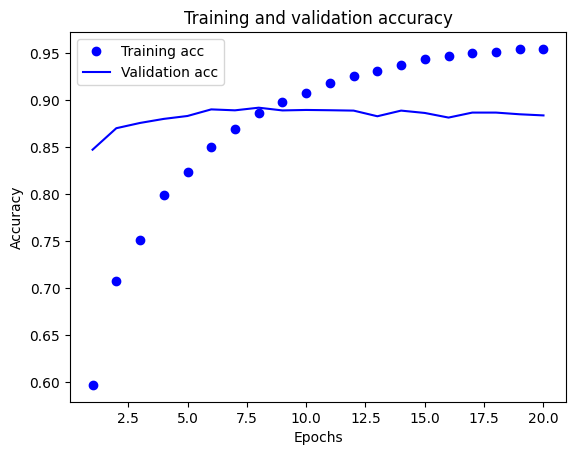

In [233]:
#plotting accuracy of model on training set versus holdout (validation) set
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### New Model to See Effectiveness on Test Data

In [239]:
#make new model with same parameters to test effectiveness of model on unseen data
validation_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(8, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
validation_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
validation_model.fit(x_train, y_train, epochs=7, batch_size=512)
results = validation_model.evaluate(x_test, y_test)
results

Epoch 1/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5706 - loss: 0.6702
Epoch 2/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7116 - loss: 0.5594
Epoch 3/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7690 - loss: 0.4819
Epoch 4/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8079 - loss: 0.4222
Epoch 5/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8289 - loss: 0.3779
Epoch 6/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8473 - loss: 0.3454
Epoch 7/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8587 - loss: 0.3119
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8877 - loss: 0.2809


[0.2811385691165924, 0.8870400190353394]

In [235]:
validation_model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.14125244],
       [0.999948  ],
       [0.97531056],
       ...,
       [0.0373238 ],
       [0.0355641 ],
       [0.7532517 ]], dtype=float32)